<a href="https://colab.research.google.com/github/callmeAyanda/Machine-Learning/blob/main/LogisticRegression_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

this is fraud detection dataset.
it is a binary classification since we're going to predict whether the person commited fraud or not.

exploring the data

In [2]:
data = pd.read_csv('Base.csv')
data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0.0,1500.0,0.0,INTERNET,16.224843,linux,1.0,1.0,0.0,0.0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0.0,1500.0,0.0,INTERNET,3.363854,other,1.0,1.0,0.0,0.0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0.0,200.0,0.0,INTERNET,22.730559,windows,0.0,1.0,0.0,0.0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0.0,200.0,0.0,INTERNET,15.215816,linux,1.0,1.0,0.0,0.0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0.0,200.0,0.0,INTERNET,3.743048,other,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575089,0,0.9,0.121500,-1,73,40,0.034257,-0.750760,AC,361,...,0.0,200.0,0.0,INTERNET,18.140978,linux,1.0,1.0,0.0,4.0
575090,0,0.9,0.109458,45,0,20,0.002754,-0.775353,AB,1010,...,0.0,200.0,0.0,INTERNET,3.300425,linux,0.0,1.0,0.0,4.0
575091,0,0.9,0.692840,-1,127,40,0.012313,-0.455889,AC,2318,...,0.0,1500.0,0.0,INTERNET,4.976440,other,1.0,1.0,0.0,4.0
575092,0,0.7,0.905059,-1,50,30,0.017382,-1.370769,AC,1032,...,1.0,200.0,0.0,INTERNET,0.389841,linux,1.0,1.0,0.0,4.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575094 entries, 0 to 575093
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        575094 non-null  int64  
 1   income                            575094 non-null  float64
 2   name_email_similarity             575094 non-null  float64
 3   prev_address_months_count         575094 non-null  int64  
 4   current_address_months_count      575094 non-null  int64  
 5   customer_age                      575094 non-null  int64  
 6   days_since_request                575094 non-null  float64
 7   intended_balcon_amount            575094 non-null  float64
 8   payment_type                      575094 non-null  object 
 9   zip_count_4w                      575094 non-null  int64  
 10  velocity_6h                       575094 non-null  float64
 11  velocity_24h                      575093 non-null  f

In [4]:
data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,575094.000000,575094.000000,575094.000000,575094.000000,575094.000000,575094.000000,5.750940e+05,575094.000000,575094.000000,575094.000000,...,575093.000000,575093.000000,575093.000000,575093.000000,575093.000000,575093.000000,575093.000000,575093.000000,575093.0,575093.000000
mean,0.009725,0.534756,0.505715,17.619932,86.152339,33.713445,1.140605e+00,9.445204,1757.905108,6582.588686,...,0.880152,10.921656,0.210371,538.318741,0.026316,8.090175,0.579798,1.024629,0.0,1.674265
std,0.098137,0.292808,0.290790,45.040612,90.709908,12.053340,5.400281e+00,20.713559,1085.908613,3082.472702,...,0.324785,12.122371,0.407573,512.288221,0.160073,8.465032,0.493592,0.202992,0.0,1.219859
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.167388,2.000000,-130.456928,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.200000,0.239561,-1.000000,18.000000,20.000000,7.303846e-03,-1.154358,1000.000000,4346.215818,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.482937,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.510689,-1.000000,50.000000,30.000000,1.550854e-02,-0.790175,1436.000000,6490.356857,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.398702,1.000000,1.000000,0.0,2.000000
75%,0.000000,0.800000,0.768739,21.000000,129.000000,40.000000,2.730227e-02,12.613620,2187.000000,8542.065376,...,1.000000,25.000000,0.000000,1000.000000,0.000000,9.361614,1.000000,1.000000,0.0,3.000000
max,1.000000,0.900000,0.999999,374.000000,425.000000,90.000000,7.658148e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,4.000000


working with the copied dataset

In [5]:
copied_data = data.copy()
copied_data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0.0,1500.0,0.0,INTERNET,16.224843,linux,1.0,1.0,0.0,0.0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0.0,1500.0,0.0,INTERNET,3.363854,other,1.0,1.0,0.0,0.0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0.0,200.0,0.0,INTERNET,22.730559,windows,0.0,1.0,0.0,0.0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0.0,200.0,0.0,INTERNET,15.215816,linux,1.0,1.0,0.0,0.0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0.0,200.0,0.0,INTERNET,3.743048,other,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575089,0,0.9,0.121500,-1,73,40,0.034257,-0.750760,AC,361,...,0.0,200.0,0.0,INTERNET,18.140978,linux,1.0,1.0,0.0,4.0
575090,0,0.9,0.109458,45,0,20,0.002754,-0.775353,AB,1010,...,0.0,200.0,0.0,INTERNET,3.300425,linux,0.0,1.0,0.0,4.0
575091,0,0.9,0.692840,-1,127,40,0.012313,-0.455889,AC,2318,...,0.0,1500.0,0.0,INTERNET,4.976440,other,1.0,1.0,0.0,4.0
575092,0,0.7,0.905059,-1,50,30,0.017382,-1.370769,AC,1032,...,1.0,200.0,0.0,INTERNET,0.389841,linux,1.0,1.0,0.0,4.0


checking for missing values

In [6]:
copied_data.isnull().sum()

,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


cleaning the data

In [7]:
copied_data = copied_data.dropna(subset=['intended_balcon_amount',
'payment_type',
'zip_count_4w',
'velocity_6h',
'velocity_24h',
'velocity_4w',
'bank_branch_count_8w',
'date_of_birth_distinct_emails_4w',
'employment_status',
'credit_risk_score',
'email_is_free',
'housing_status',
'phone_home_valid',
'phone_mobile_valid',
'bank_months_count',
'has_other_cards',
'proposed_credit_limit',
'foreign_request',
'source',
'session_length_in_minutes',
'device_os',
'keep_alive_session',
'device_distinct_emails_8w',
'device_fraud_count',
'month'])

In [8]:
copied_data.duplicated().sum()

0

cleaning the data where columns have (-1) represent missing values, removing those rows

In [9]:
columns_to_check = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes']

# Drop rows where any of the specified columns have a value of -1
copied_data = copied_data[~copied_data[columns_to_check].eq(-1).any(axis=1)]

checking the unique features within each variable and creating dummy variables for categorical data into numerical data

In [10]:
copied_data['payment_type'].unique()

array(['AB', 'AA', 'AD', 'AC', 'AE'], dtype=object)

In [11]:
paymenttype_dummy = pd.get_dummies(copied_data['payment_type']).astype(int)
merged = pd.concat([copied_data, paymenttype_dummy], axis='columns')
copied_data = merged.drop(['payment_type'], axis='columns')

In [12]:
copied_data['source'].unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [13]:
sourcedummy = pd.get_dummies(copied_data['source']).astype(int)
merged = pd.concat([copied_data, sourcedummy], axis='columns')
copied_data = merged.drop(['source'], axis='columns')

In [14]:
copied_data['employment_status'].unique()

array(['CA', 'CB', 'CF', 'CD', 'CC', 'CE', 'CG'], dtype=object)

In [15]:
employment_status_dummy = pd.get_dummies(copied_data['employment_status']).astype(int)
merged = pd.concat([copied_data, employment_status_dummy], axis='columns')
copied_data = merged.drop(['employment_status'], axis='columns')

In [16]:
copied_data['device_os'].unique()

array(['windows', 'linux', 'x11', 'other', 'macintosh'], dtype=object)

In [17]:
device_os_dummy = pd.get_dummies(copied_data['device_os']).astype(int)
merged = pd.concat([copied_data, device_os_dummy], axis='columns')
copied_data = merged.drop(['device_os'], axis='columns')

In [18]:
copied_data['housing_status'].unique()

array(['BC', 'BB', 'BA', 'BE', 'BD', 'BF', 'BG'], dtype=object)

In [19]:
housing_status_dummy = pd.get_dummies(copied_data['housing_status']).astype(int)
merged = pd.concat([copied_data, housing_status_dummy], axis='columns')
copied_data = merged.drop(['housing_status'], axis='columns')

In [20]:
copied_data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,other,windows,x11,BA,BB,BC,BD,BE,BF,BG
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,0,1,0,0,0,1,0,0,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,0,0,0,0,0,1,0,0,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,...,0,0,1,0,0,1,0,0,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,...,1,0,0,0,0,1,0,0,0,0
18,0,0.2,0.527751,13,114,20,0.003171,-0.848347,4389,12256.250056,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575051,0,0.1,0.141696,54,7,20,0.006378,46.920915,1376,5656.031004,...,0,0,0,0,0,1,0,0,0,0
575052,0,0.7,0.143704,30,4,40,0.004185,-1.242606,1197,6737.103045,...,0,1,0,0,0,1,0,0,0,0
575054,0,0.3,0.589494,33,13,20,0.006978,-0.878319,733,9369.019413,...,1,0,0,0,0,0,0,1,0,0
575059,0,0.7,0.795973,226,11,20,1.170629,41.500525,1643,4083.708593,...,1,0,0,1,0,0,0,0,0,0


In [21]:
copied_data.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month', 'AA', 'AB', 'AC', 'AD', 'AE', 'INTERNET', 'TELEAPP', 'CA',
       'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'linux', 'macintosh', 'other',
       'windows', 'x11', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'],
      dtype='object')

double checking whether the dataset has updated as suppose to

In [22]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120404 entries, 2 to 575090
Data columns (total 53 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        120404 non-null  int64  
 1   income                            120404 non-null  float64
 2   name_email_similarity             120404 non-null  float64
 3   prev_address_months_count         120404 non-null  int64  
 4   current_address_months_count      120404 non-null  int64  
 5   customer_age                      120404 non-null  int64  
 6   days_since_request                120404 non-null  float64
 7   intended_balcon_amount            120404 non-null  float64
 8   zip_count_4w                      120404 non-null  int64  
 9   velocity_6h                       120404 non-null  float64
 10  velocity_24h                      120404 non-null  float64
 11  velocity_4w                       120404 non-null  float6

visualizing the data

<Figure size 1200x800 with 0 Axes>

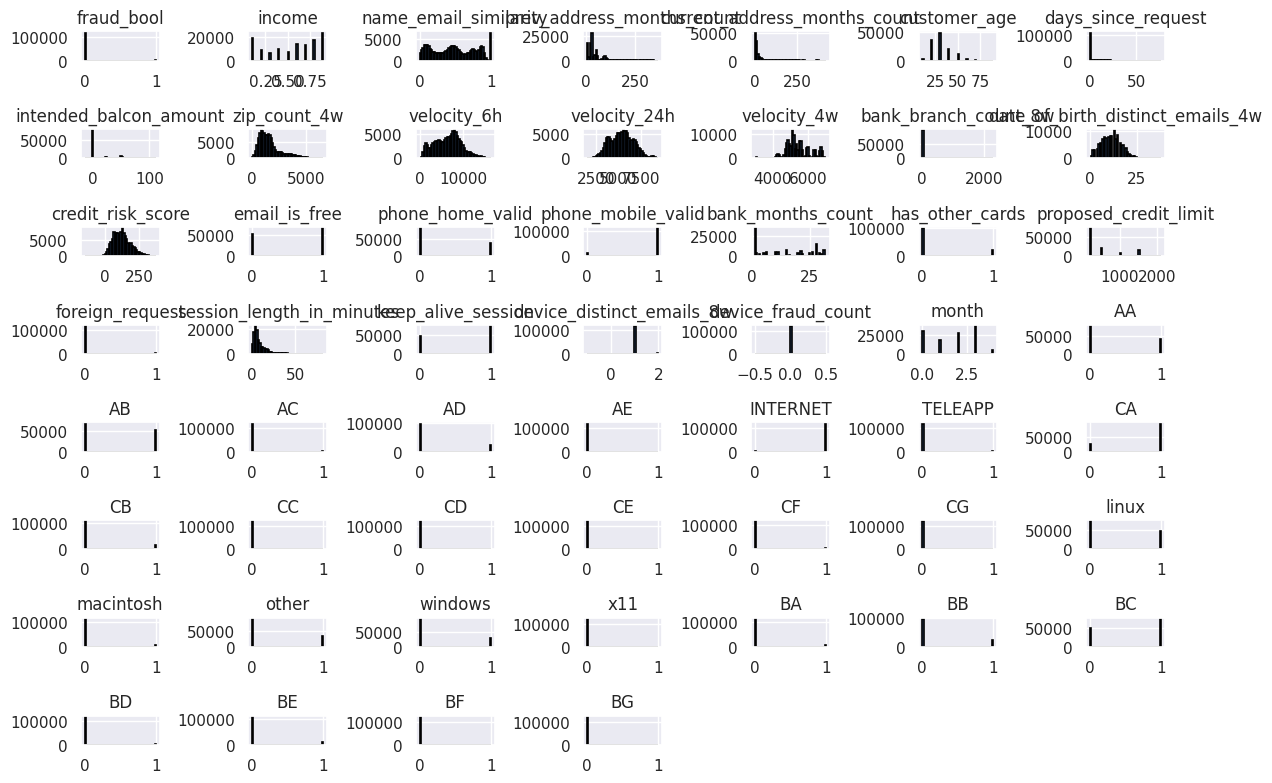

In [23]:
plt.figure(figsize=(12,8))
copied_data.hist(bins=50, edgecolor='black', linewidth=1.2, figsize=(12,8))
plt.tight_layout()
plt.show()

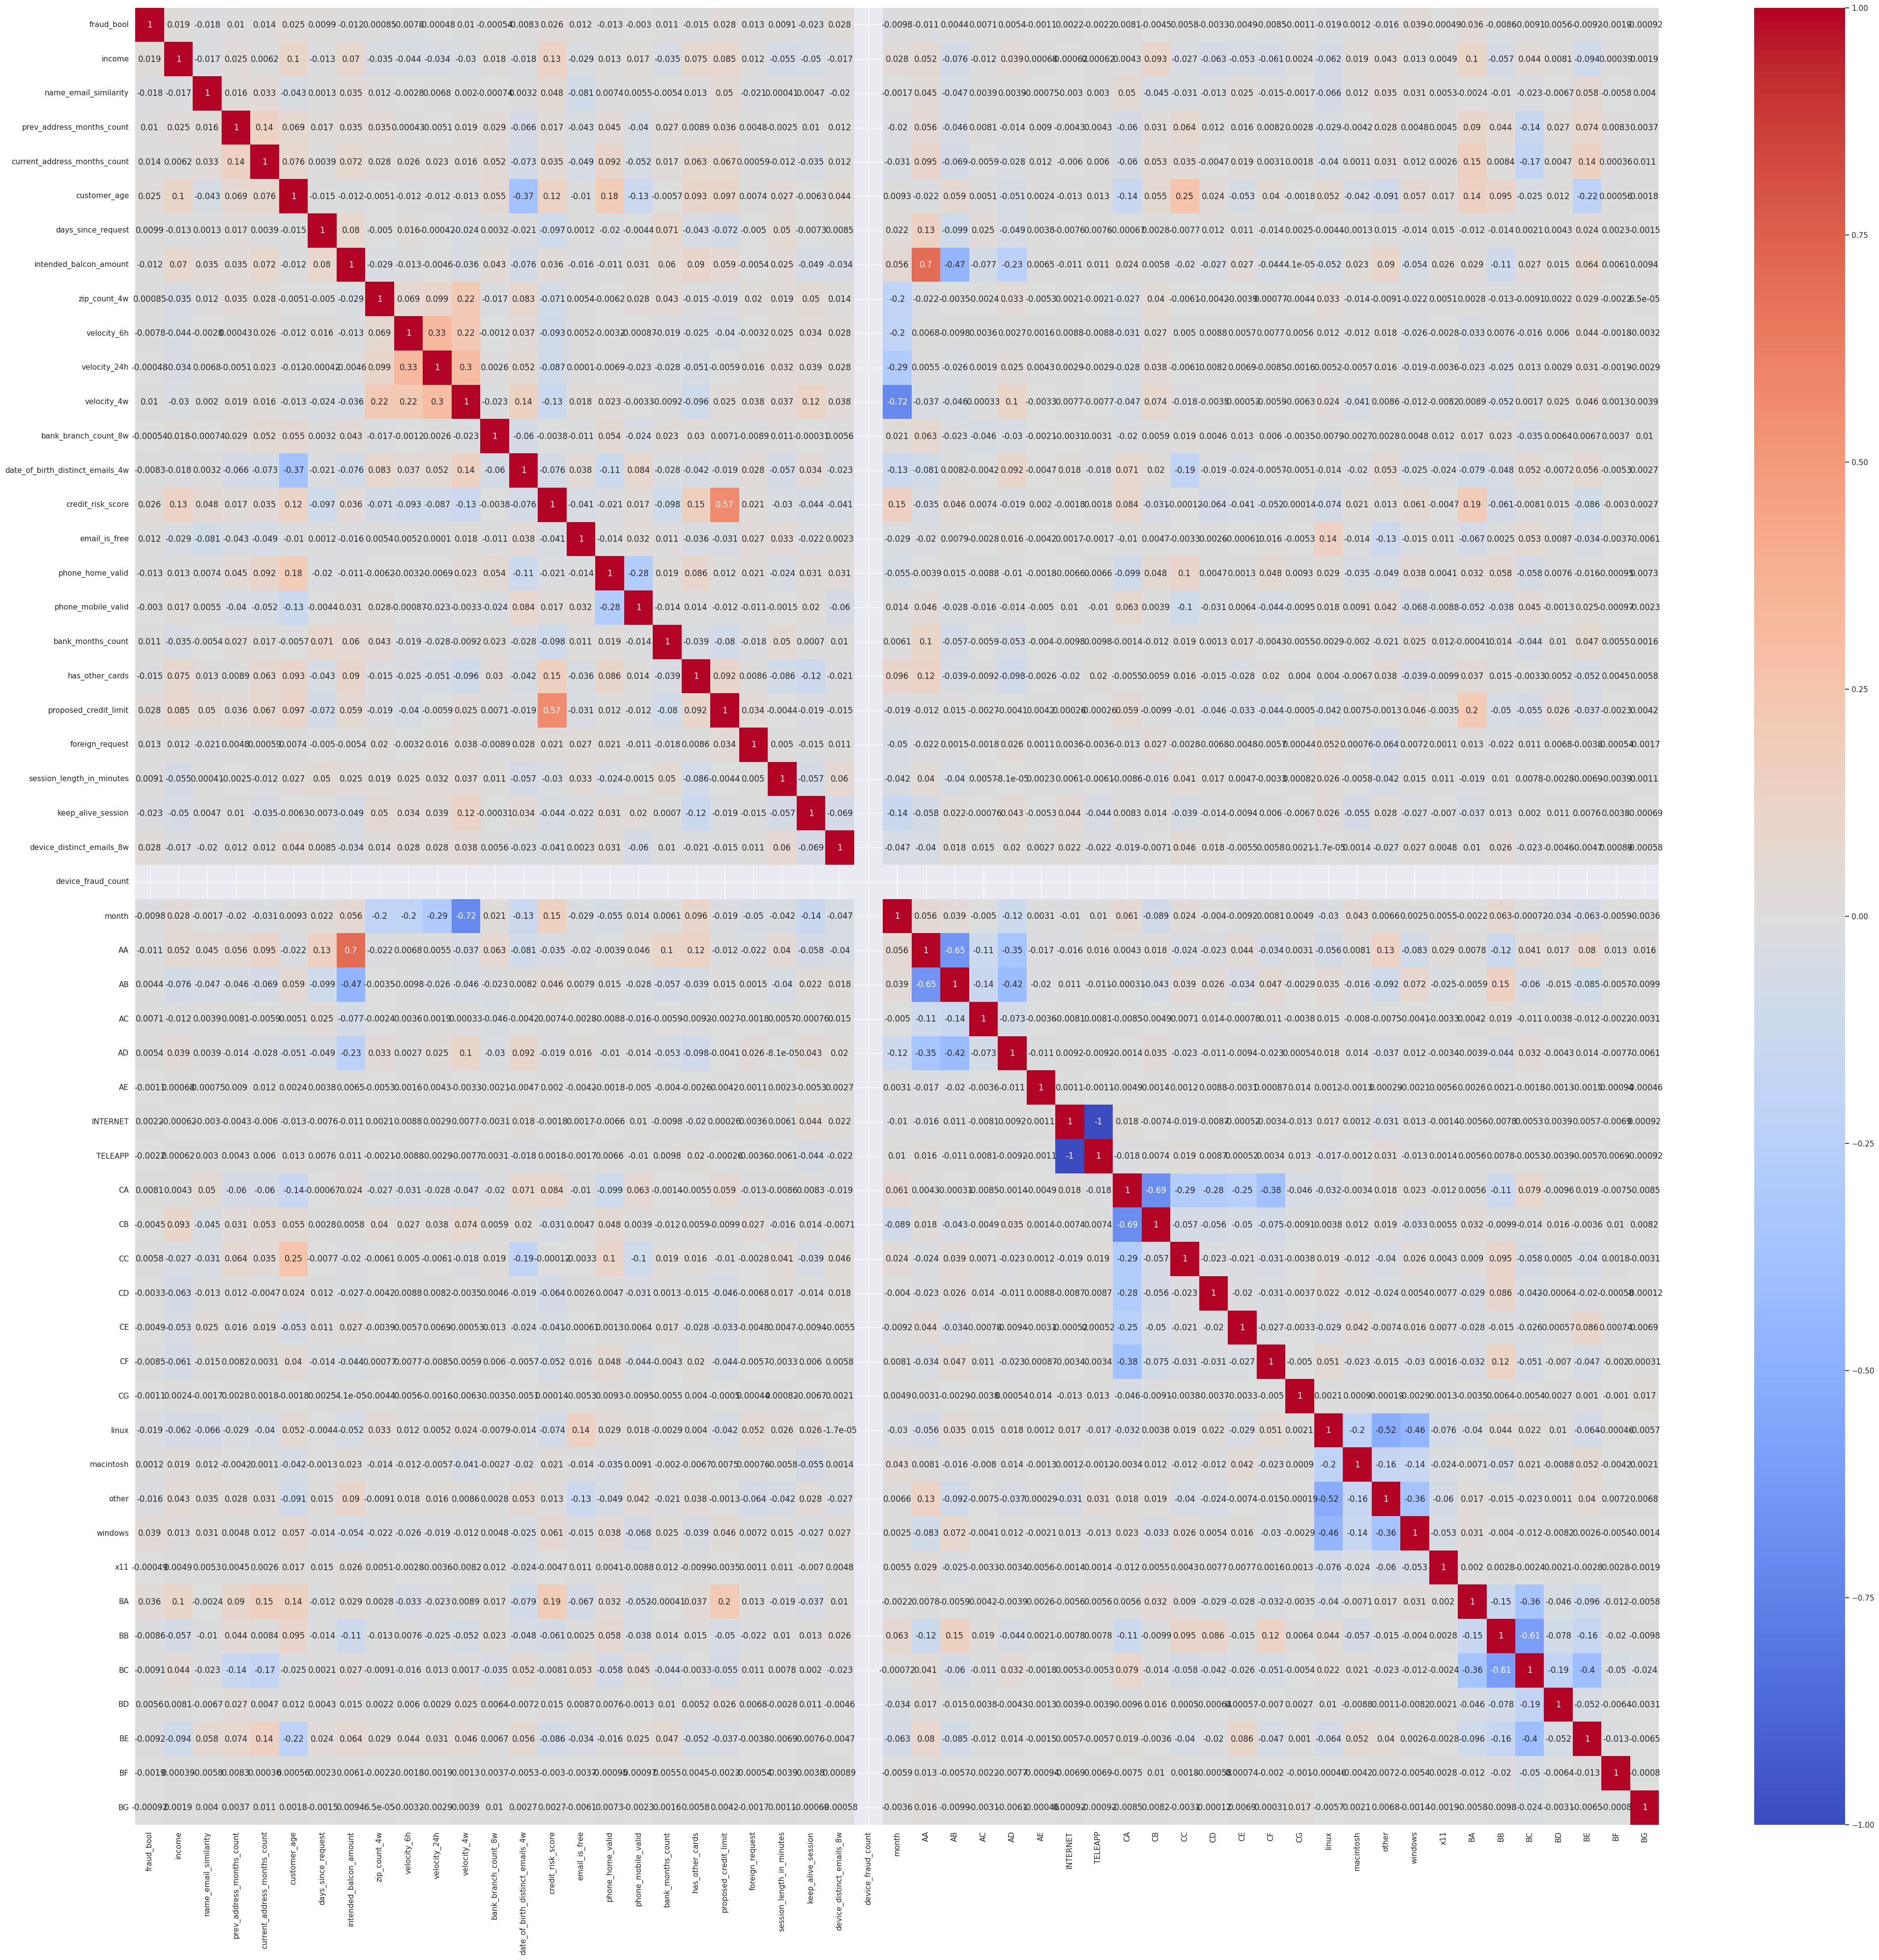

In [24]:
plt.figure(figsize=(50,48))
sns.heatmap(copied_data.corr(), annot=True, cmap='coolwarm')
plt.show()

now we are seperating the target variable from the independent variables

In [25]:
x = copied_data.drop(['fraud_bool'], axis=1)
y = copied_data['fraud_bool']

now we are going standardize our data and add feature selection so that no data overweighs the other

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report, roc_curve, auc

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

we are balancing the classes in the datset to ensure that no class outweighs the other

In [29]:
model = LogisticRegression(class_weight='balanced', random_state=42)

we are checking accuracy levels of the model

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

over here we are handling any imbalances between the 2 classes so that the data can handle/represent each class appropriately

In [31]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9978821257643553
Testing Accuracy:  0.9977160416926207


In [32]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
model.predict_proba(x_test)

array([[9.96542637e-01, 3.45736268e-03],
       [9.98573864e-01, 1.42613619e-03],
       [9.99609823e-01, 3.90176842e-04],
       ...,
       [9.92180254e-01, 7.81974643e-03],
       [9.98181128e-01, 1.81887212e-03],
       [9.99750862e-01, 2.49137769e-04]])

In [34]:
confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print(classification_report(y_test, y_test_pred))

<function confusion_matrix at 0x79bb523f8550>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24026
           1       0.00      0.00      0.00        55

    accuracy                           1.00     24081
   macro avg       0.50      0.50      0.50     24081
weighted avg       1.00      1.00      1.00     24081



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Curve and AUC Score for Binary Classification

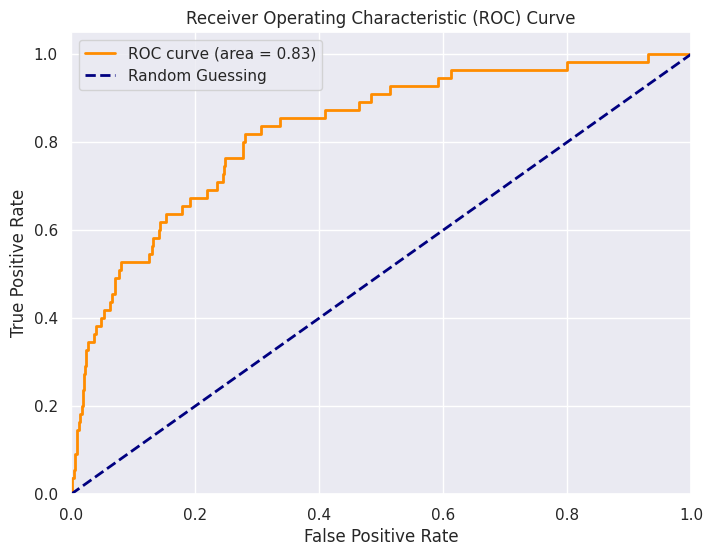

In [35]:
if len(np.unique(y)) == 2:
    y_test_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

Visualization of Confusion Matrix

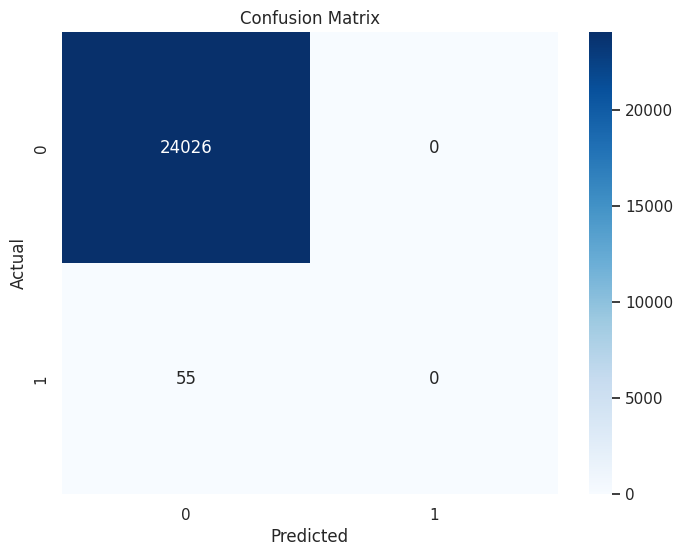

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

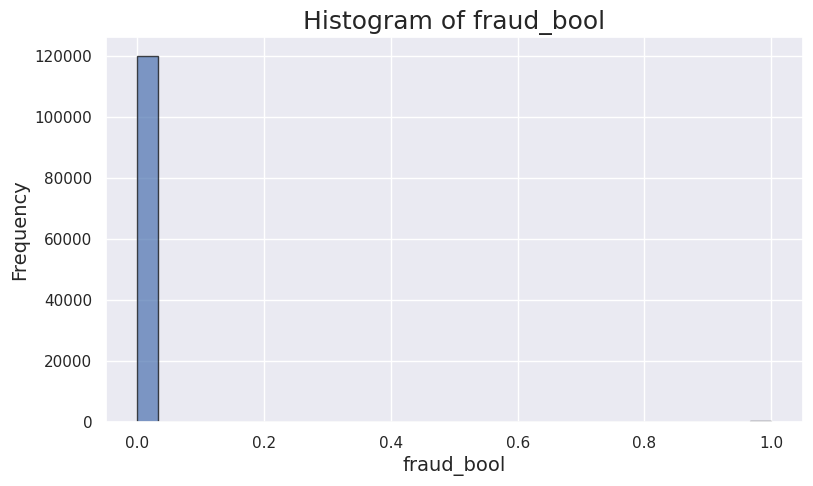

In [37]:
plt.figure(figsize=(9, 5))  # Set the figure size

# Replace 'column_name' with the actual name of the column you want to plot
plt.hist(copied_data['fraud_bool'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('fraud_bool', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of fraud_bool', fontsize=18)

plt.show()

In [38]:
copied_data['fraud_bool'].value_counts()

,count
fraud_bool,
0,120146
1,258


In [39]:
copied_data

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,other,windows,x11,BA,BB,BC,BD,BE,BF,BG
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,0,1,0,0,0,1,0,0,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,0,0,0,0,0,1,0,0,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,...,0,0,1,0,0,1,0,0,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,...,1,0,0,0,0,1,0,0,0,0
18,0,0.2,0.527751,13,114,20,0.003171,-0.848347,4389,12256.250056,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575051,0,0.1,0.141696,54,7,20,0.006378,46.920915,1376,5656.031004,...,0,0,0,0,0,1,0,0,0,0
575052,0,0.7,0.143704,30,4,40,0.004185,-1.242606,1197,6737.103045,...,0,1,0,0,0,1,0,0,0,0
575054,0,0.3,0.589494,33,13,20,0.006978,-0.878319,733,9369.019413,...,1,0,0,0,0,0,0,1,0,0
575059,0,0.7,0.795973,226,11,20,1.170629,41.500525,1643,4083.708593,...,1,0,0,1,0,0,0,0,0,0
